# **Completion Project**: Does entirely completing a game help to appreciate it ? 

**Author**: PRADEL--FERNANDES Nycia

**Date**: january 2026

_I've always wondered if going on a tremendous journey to uncover every single mystery of a game was worth my time_.<br>My gaming habits dictates me to continue doing so : but what if I am disgusting myself of the games I play ? Even though I get a strong sense of fulfillment from my gameplay, other people (some of my friends) are more inclined to stop playing after reaching one of the endings, or even to stop playing altogether in the middle of the game. 

This study attempts to answer this question by analyzing feedback from players: <br> **Do you enjoy a game more when you complete it 100%?**

**Predictions:**
- **P1:** *« Finishable » games have better average rating.*
- **P2:** *the longer is the additional time to master a game (compared to finishing it), the better it is rated.*
- **P3:** *people that « mastered » a game are more likely to give it a higher rating.*

## 0. Library Import

In [120]:
# Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

# Modelling : 
import statsmodels.formula.api as smf

# Test models :
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [121]:
# Font & graphics parameters
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    'font.family': 'DejaVu Serif',
    'font.serif': 'EB Garamond',
    'font.size': 12
})

palette = sns.color_palette("twilight", n_colors=10)[0::2]
palette2 = sns.color_palette("twilight", n_colors=10)[6::2]

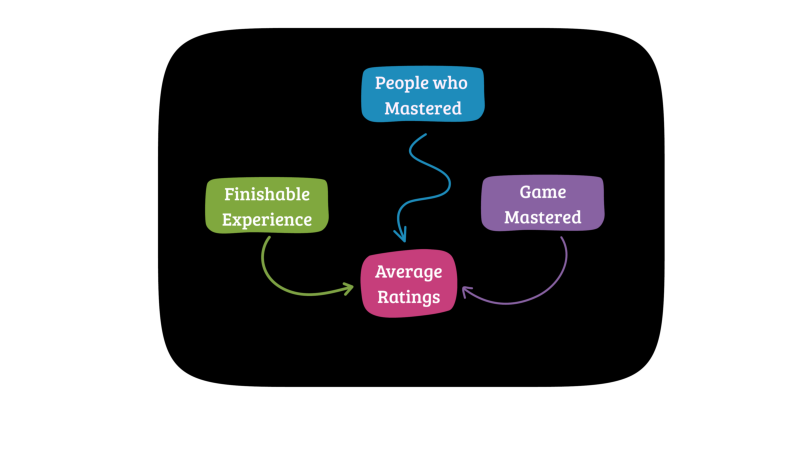

In [ ]:
# Directed Acyclic Graph
images = convert_from_path("DAG_completio.pdf")
plt.figure(figsize=(10, 8))
plt.imshow(images[0])
plt.axis('off')
plt.show()


## 1. Data import

The datasets come from scraping the website [Backolggd](https://backloggd.com/) on October and December 2025. <br><br>The first one is composed with the 10306 games the most "logged" on the platform, when the second one is the compilation of all the reviews for the 100 most logged games that have an average time to finish register on their page (N = 414169). 

In [ ]:
df = pd.read_csv("Backloggd_Nov2025.csv", delimiter = ',')
df.head(5)

,Title,Developer,URL,Summary,Genres,Platforms,Playing,Plays,Backlogs,Wishlists,...,Average time,Time to finish,Finishable,Time to master,Masterable,Likes,Lists,Reviews,Year,Month
0,Grand Theft Auto V,"Rockstar North, Rockstar Games",https://backloggd.com/games/grand-theft-auto-v/,Grand Theft Auto V is a vast open world game s...,"Adventure, Racing, Shooter","Windows PC, PlayStation 4, Xbox One, PlayStati...",3900,142000,15000,3000,...,209,50.0,1,188.0,1,8300,8600,8600,2013.0,9.0
1,Minecraft: Java Edition,Mojang Studios,https://backloggd.com/games/minecraft-java-edi...,Minecraft focuses on allowing the player to ex...,"Adventure, Simulator","Windows PC, Mac, Linux",7800,129000,4600,806,...,1393,51.0,1,NaN,0,8600,6700,10000,2011.0,11.0
2,The Legend of Zelda: Breath of the Wild,"Nintendo EPD Production Group No. 3, Nintendo",https://backloggd.com/games/the-legend-of-zeld...,The Legend of Zelda: Breath of the Wild is the...,"Adventure, Puzzle","Nintendo Switch, Wii U",7400,124000,20000,9800,...,121,74.0,1,211.0,1,11000,15000,11000,2017.0,3.0
3,Portal 2,"Valve, Electronic Arts",https://backloggd.com/games/portal-2/,"Sequel to the acclaimed Portal (2007), Portal ...","Adventure, Platform, Puzzle","Windows PC, Mac, Linux, Nintendo Switch, PlayS...",2100,121000,20000,5000,...,17,9.0,1,NaN,0,9600,11000,8100,2011.0,4.0
4,Elden Ring,"FromSoftware, Bandai Namco Entertainment",https://backloggd.com/games/elden-ring/,Elden Ring is an action RPG developed by FromS...,"Adventure, RPG","Windows PC, Nintendo Switch 2, PlayStation 5, ...",13000,120000,28000,18000,...,137,101.0,1,112.0,1,15000,18000,16000,2022.0,2.0


In [ ]:
df_comments = pd.read_csv('100games_Backloggd.csv', delimiter = ',')
df_comments.head(5)

,Game,Date,User,Comment,Rating,Mastered,Gaming Status
0,Grand Theft Auto V,"Dec 04, 2025",Adachi7,GTAV fez história e marcou gerações. Joguei mt...,5.0,0,Completed
1,Grand Theft Auto V,"Dec 04, 2025",UHKUH,WE YES (ME AND YOU) WERE SHOOTİNG BLANKS TO TH...,4.0,0,Completed
2,Grand Theft Auto V,"Dec 04, 2025",alcinadimitrescu,PEAKKKKKK\nsmoking duck gif,5.0,0,Completed
3,Grand Theft Auto V,"Dec 04, 2025",Samugil,I can't stand the story mode. Thank goodness t...,2.5,0,Abandoned
4,Grand Theft Auto V,"Dec 04, 2025",nova_solace,driving around online in the whole map on a su...,5.0,1,Completed


## 2. Data manipulation

In [125]:
# Creation of the mastered-finished ratio: 
df_ratio = df[df['Finishable'] == 1]
df_ratio = df_ratio[df_ratio['Masterable'] == 1]

df_ratio['Ratio_M-F'] = (df_ratio['Time to master'] - df_ratio['Time to finish'])/df_ratio['Time to master']
df_ratio['Ratio_M-F_dixieme'] = df_ratio['Ratio_M-F'].round(1)

# Convert column to numeric 
df['Average rating'] = pd.to_numeric(df['Average rating'], errors='coerce')

In [126]:
# Report the master-finished Ratio on the comments dataset:
ratio_dict = dict(zip(df_ratio['Title'], df_ratio['Ratio_M-F']))
df_comments['Ratio_M-F'] = df_comments['Game'].map(ratio_dict)

# Report the Average rating of each game on the comments dataset:
ratings_dict = dict(zip(df['Title'], df['Average rating']))
df_comments['Average rating'] = df_comments['Game'].map(ratings_dict)
df_comments['Ratio_M-F'] = df_comments['Game'].map(dict(zip(df['Title'], df_ratio['Ratio_M-F'])))
df_comments['Ratio_heatmap'] = df_comments['Game'].map(dict(zip(df['Title'], df_ratio['Ratio_M-F_dixieme'])))

## 3. Data description

/var/folders/gp/2nk20nk11_18lvbpnfkxw8s80000gp/T/ipykernel_3842/40261413.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Average rating'], palette='twilight', ax = ax1)
/var/folders/gp/2nk20nk11_18lvbpnfkxw8s80000gp/T/ipykernel_3842/40261413.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Finishable', palette = palette, ax = ax2)
/var/folders/gp/2nk20nk11_18lvbpnfkxw8s80000gp/T/ipykernel_3842/40261413.py:25: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data = df, x = 'Finishable', palette = palette, ax = ax2)
/var/folders/gp/2nk20nk11_18lvbpnfkxw8s80000gp/T/ipykernel_3842/40261413.py:27: Us

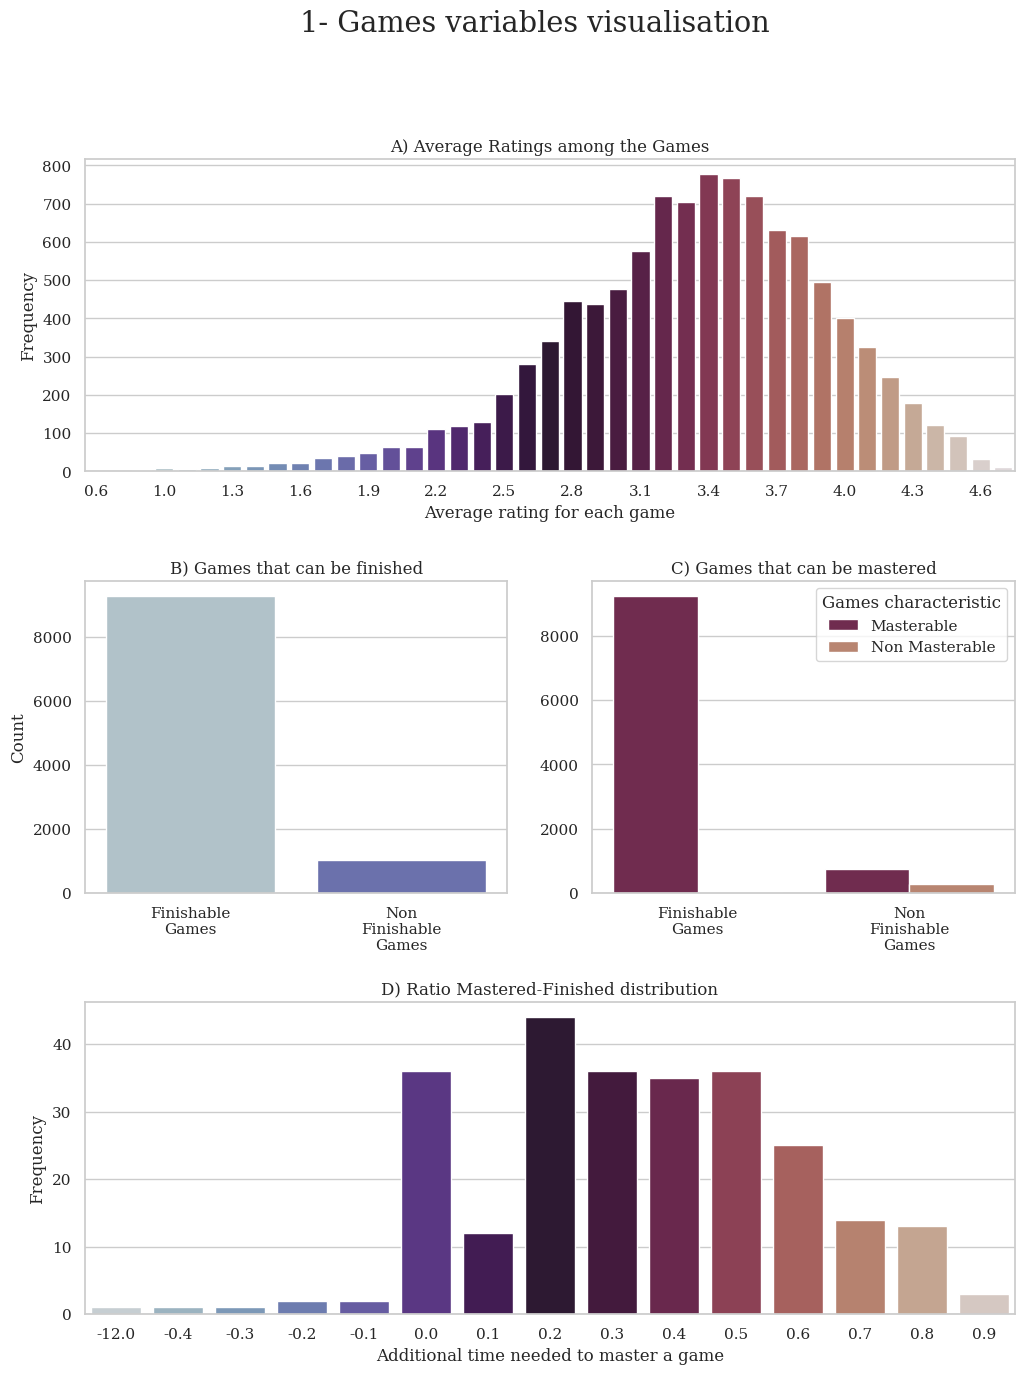

In [127]:
fig = plt.figure(figsize = (12, 15))
fig.suptitle("1- Games variables visualisation", fontsize = "xx-large")

ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 2), (1, 0))
ax3 = plt.subplot2grid((3, 2), (1, 1))
ax4 = plt.subplot2grid((3, 2), (2, 0), colspan=2)

## A : Average ratings
sns.countplot(x=df['Average rating'], palette='twilight', ax = ax1)
ratings = sorted(df['Average rating'].unique())

display_ratings = ratings[::3]
tick_ratings = [i for i, ratings in enumerate(ratings) if ratings in display_ratings]

ax1.set_title('A) Average Ratings among the Games')
ax1.set_xticks(tick_ratings, display_ratings)
ax1.set_xlabel('Average rating for each game')
ax1.set_ylabel('Frequency')

## B : Finishable Games 
finishable_mapping = {0: 'Non\nFinishable\nGames', 1: 'Finishable\nGames'}
masterable_mapping = {1: 'Masterable', 0: 'Non Masterable'}

sns.countplot(data = df, x = 'Finishable', palette = palette, ax = ax2)
ax2.set_title('B) Games that can be finished')
ax2.set_xticklabels([finishable_mapping[val] for val in df['Finishable'].unique()])
ax2.set_xlabel('')
ax2.set_ylabel('Count')


## C : Masterable games
sns.countplot(data = df, x = 'Finishable', hue = 'Masterable', palette = palette2, ax = ax3)
ax3.set_xticklabels([finishable_mapping[val] for val in df['Finishable'].unique()])
new_legend_labels = [masterable_mapping[val] for val in df['Masterable'].unique()]
ax3.set_xlabel('')
ax3.set_ylabel('')
handles, _ = ax3.get_legend_handles_labels()
ax3.legend(handles, new_legend_labels, title='Games characteristic', loc='best')
ax3.set_title('C) Games that can be mastered')

## D : Ratio Mastered-finished
sns.countplot(data = df_ratio, x = 'Ratio_M-F_dixieme', palette = 'twilight', ax = ax4)
ratio = sorted(df_ratio['Ratio_M-F_dixieme'].unique())
tick_ratio = [i for i, ratio in enumerate(ratio)]

ax4.set_title('D) Ratio Mastered-Finished distribution')
ax4.set_xticks(tick_ratio)
ax4.set_xlabel('Additional time needed to master a game')
ax4.set_ylabel('Frequency')

fig.subplots_adjust(hspace=0.35)

plt.show()

/var/folders/gp/2nk20nk11_18lvbpnfkxw8s80000gp/T/ipykernel_3842/1477887044.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_comments['Average rating'], palette='twilight', ax = ax1)
/var/folders/gp/2nk20nk11_18lvbpnfkxw8s80000gp/T/ipykernel_3842/1477887044.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_mastered['Rating'], palette='twilight', ax=ax2)
/var/folders/gp/2nk20nk11_18lvbpnfkxw8s80000gp/T/ipykernel_3842/1477887044.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_nonmastered['Rating'], palette='twil

Text(0, 0.5, 'Count')

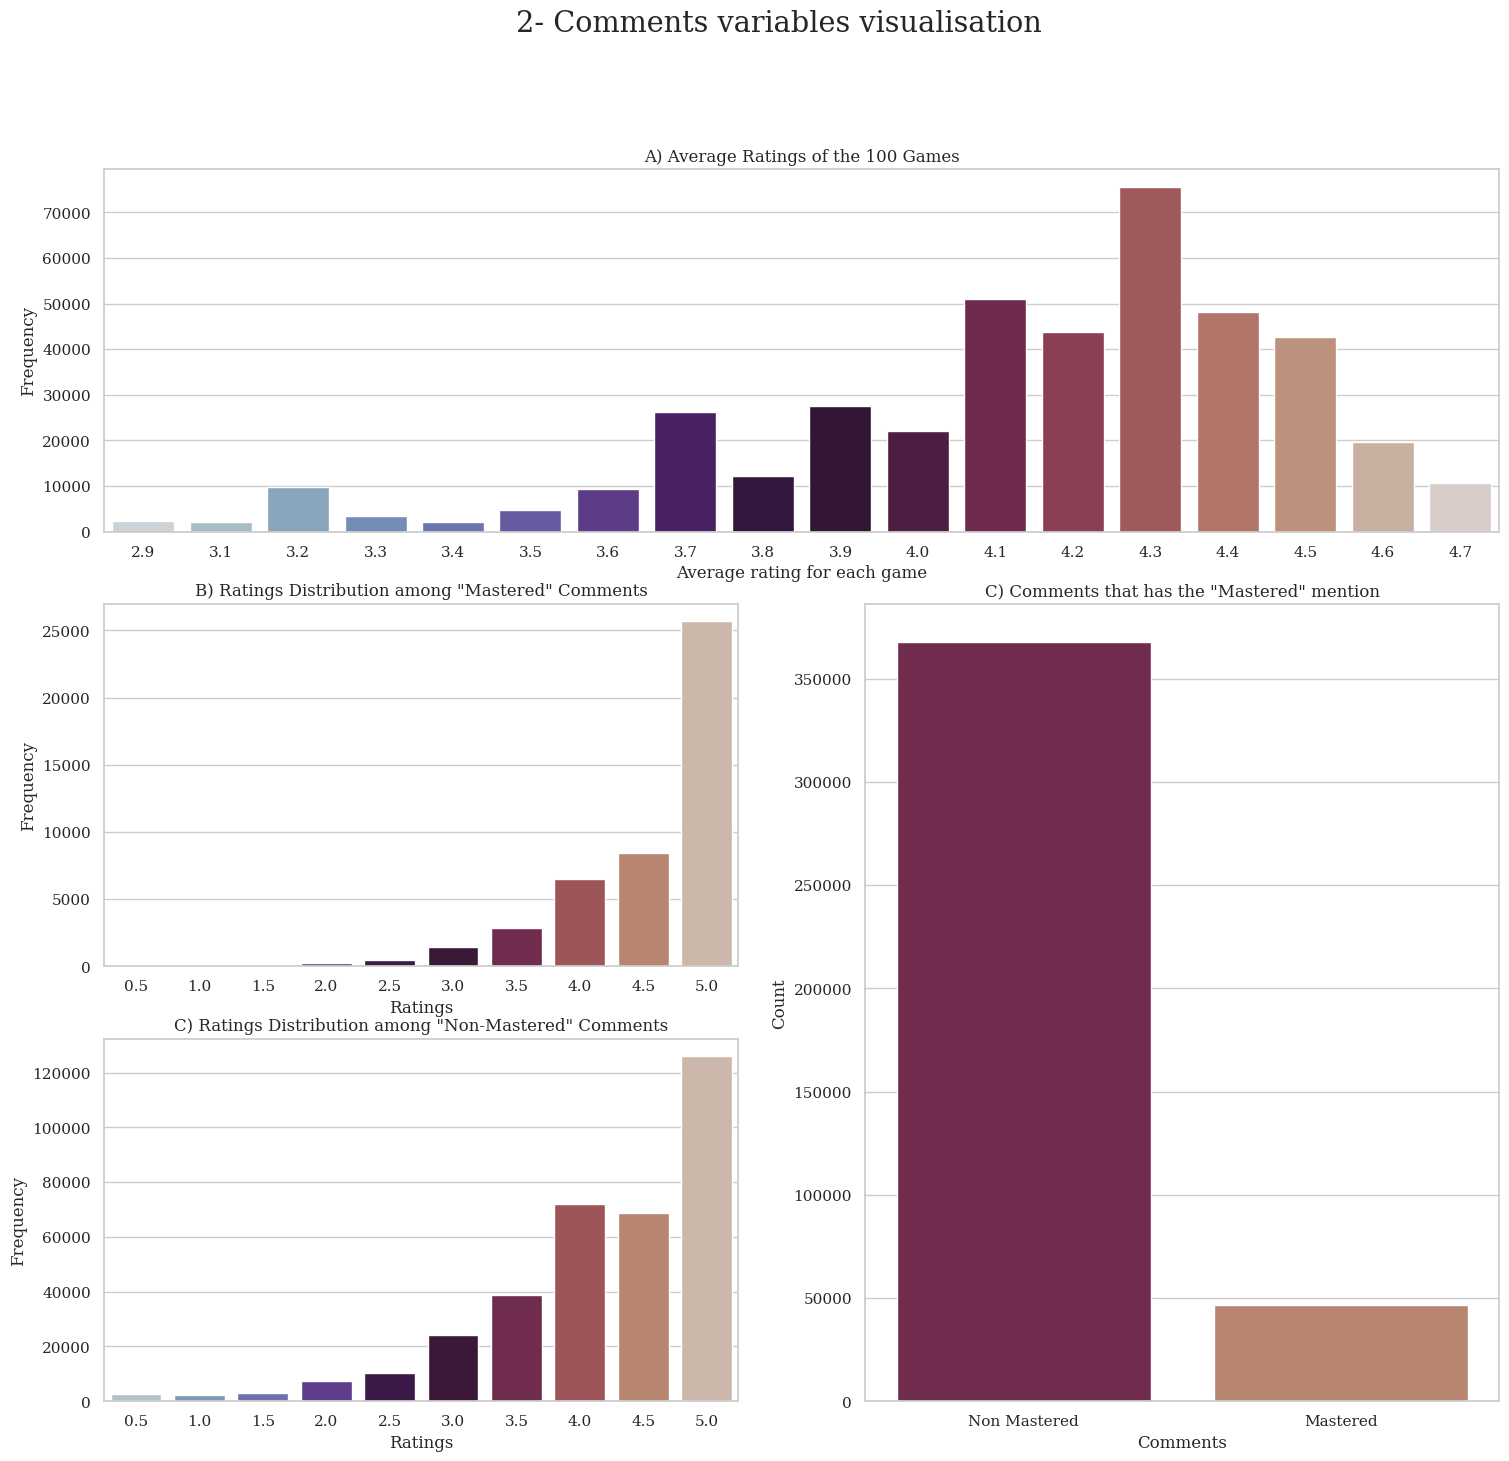

In [128]:
fig = plt.figure(figsize = (18, 16))
fig.suptitle("2- Comments variables visualisation", fontsize = "xx-large")

ax1 = plt.subplot2grid((3, 2), (0, 0), colspan = 2)
ax2 = plt.subplot2grid((3, 2), (1, 0))
ax3 = plt.subplot2grid((3, 2), (2, 0))
ax4 = plt.subplot2grid((3,2), (1,1), rowspan=2)

## A : Ratings Distribution
sns.countplot(x=df_comments['Average rating'], palette='twilight', ax = ax1)
ratings = sorted(df_comments['Average rating'].unique())

ax1.set_title('A) Average Ratings of the 100 Games')
ax1.set_xlabel('Average rating for each game')
ax1.set_ylabel('Frequency')


## B : Ratings Distribution of Mastered Comments :
df_mastered = df_comments[df_comments['Mastered'] == 1]
sns.countplot(x=df_mastered['Rating'], palette='twilight', ax=ax2)
ratings = sorted(df_mastered['Rating'].unique())

ax2.set_title('B) Ratings Distribution among "Mastered" Comments')
ax2.set_xlabel('Ratings')
ax2.set_ylabel('Frequency')

## C : Ratings Distribution of Mastered Comments :
df_nonmastered = df_comments[df_comments['Mastered'] == 0]
sns.countplot(x=df_nonmastered['Rating'], palette='twilight', ax = ax3)
ratings = sorted(df_nonmastered['Rating'].unique())

ax3.set_title('C) Ratings Distribution among "Non-Mastered" Comments')
ax3.set_xlabel('Ratings')
ax3.set_ylabel('Frequency')

## C : Mastered comments
mas_com_mapping = {1: 'Mastered', 0: 'Non Mastered'}

sns.countplot(data = df_comments, x = 'Mastered', palette = palette2, ax = ax4)
ax4.set_title('C) Comments that has the "Mastered" mention')
ax4.set_xticklabels([mas_com_mapping[val] for val in df_comments['Mastered'].unique()])
ax4.set_xlabel('Comments')
ax4.set_ylabel('Count')

## 4. Data modelling

In [131]:
# Testing the normality of each group
_, p_finishable = shapiro(df[df['Finishable'] == 1]['Average rating'].dropna())
_, p_non_finishable = shapiro(df[df['Finishable'] == 0]['Average rating'].dropna())

print(f"p-value (Finishable) = {p_finishable}")
print(f"p-value (Non Finishable) = {p_non_finishable}")


p-value (Finishable) = 3.030595216678876e-13
p-value (Non Finishable) = 1.1430374786716125e-34


/Users/Nycia/miniforge3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9286.
  res = hypotest_fun_out(*samples, **kwds)


The results of the *Shapiro-Wilk test* show us that our data are not normalized, and as such we can't use a t-test as we initially intended to do (*see PreReg of Nov. 2025*). In place, we will proceed with a non-parametric test, the *Mann-Whitney* one, that allows us to perform an equivalent of the t-test on our data. 

In [132]:
# P1 : Mann-Whitney (non-normalized data)
u_stat, p_value = mannwhitneyu(df[df['Finishable'] == 1]['Average rating'].dropna(), df[df['Finishable'] == 0]['Average rating'].dropna())
print(f"Mann-Whitney U test: p-value = {p_value}")

Mann-Whitney U test: p-value = 6.838898716544813e-147


/var/folders/gp/2nk20nk11_18lvbpnfkxw8s80000gp/T/ipykernel_3842/2445222772.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['Finishable'], y = df['Average rating'], palette = palette)
/var/folders/gp/2nk20nk11_18lvbpnfkxw8s80000gp/T/ipykernel_3842/2445222772.py:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(x = df['Finishable'], y = df['Average rating'], palette = palette)


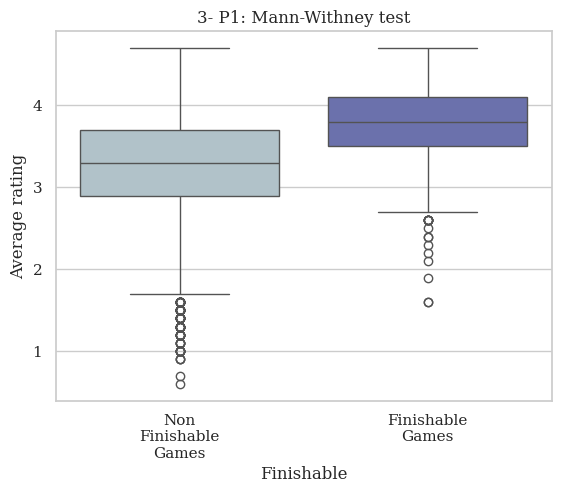

In [133]:
sns.boxplot(x = df['Finishable'], y = df['Average rating'], palette = palette)

finishable_mapping = {0: 'Non\nFinishable\nGames', 1: 'Finishable\nGames'}
categories = sorted(df['Finishable'].unique())
positions = range(len(finishable_mapping))
labels = [finishable_mapping[cat] for cat in categories]

plt.title('3- P1: Mann-Withney test')
plt.xticks(ticks = positions, labels = labels)
plt.show()

The results of the test shows us that the difference between Finishable Games and Non-finishable Games is significative (p<0,05). Thus, we can observe that the average rating of Finishable Games is higher than the Non-Finishable ones (_fig. 3_)

In [146]:
# P3: Linear Regression model
model = smf.ols(formula = 'Rating ~ Mastered', data = df_comments).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     7293.
Date:                Tue, 13 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:46:45   Log-Likelihood:            -5.1714e+05
No. Observations:              401202   AIC:                         1.034e+06
Df Residuals:                  401200   BIC:                         1.034e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1775      0.001   2836.015      0.0

/var/folders/gp/2nk20nk11_18lvbpnfkxw8s80000gp/T/ipykernel_3842/4060993565.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df_comments['Mastered'], y = df_comments['Rating'], palette = palette2)


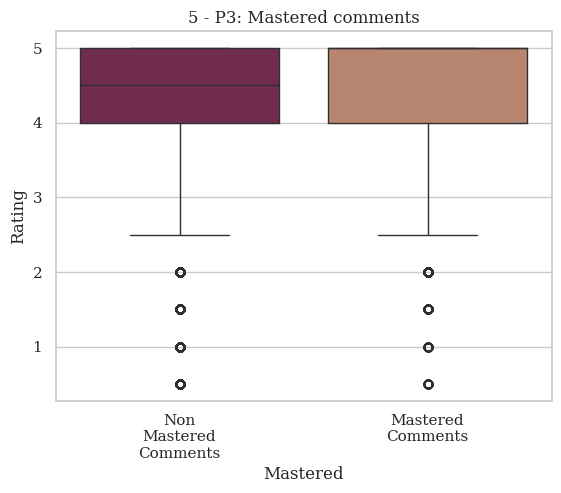

In [158]:
sns.boxplot(x = df_comments['Mastered'], y = df_comments['Rating'], palette = palette2)

masterable_mapping = {0: 'Non\nMastered\nComments', 1: 'Mastered\nComments'}
categories = sorted(df_comments['Mastered'].unique())
positions = range(len(masterable_mapping))
labels = [masterable_mapping[cat] for cat in categories]

plt.title('5 - P3: Mastered comments')
plt.xticks(ticks = positions, labels = labels)
plt.show()

The average rating is better among comments of people who mastered a game than in the others. 

In [134]:
# P2 : Linear regression model
model = smf.ols(formula = 'Q("Average rating") ~ Q("Ratio_M-F")', data = df_ratio).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Q("Average rating")   R-squared:                       0.035
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     9.396
Date:                 Tue, 13 Jan 2026   Prob (F-statistic):            0.00240
Time:                         17:52:24   Log-Likelihood:                -114.29
No. Observations:                  261   AIC:                             232.6
Df Residuals:                      259   BIC:                             239.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8800      0.0

In [ ]:
# P2 (& P3): Multivariate Linear Regression 
model = smf.ols(formula = 'Q("Rating") ~ Q("Ratio_M-F") + Q("Mastered")', data = df_comments).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Q("Rating")   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3785.
Date:                Tue, 13 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:52:24   Log-Likelihood:            -5.1563e+05
No. Observations:              400059   AIC:                         1.031e+06
Df Residuals:                  400056   BIC:                         1.031e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.1318      0.003   1396.

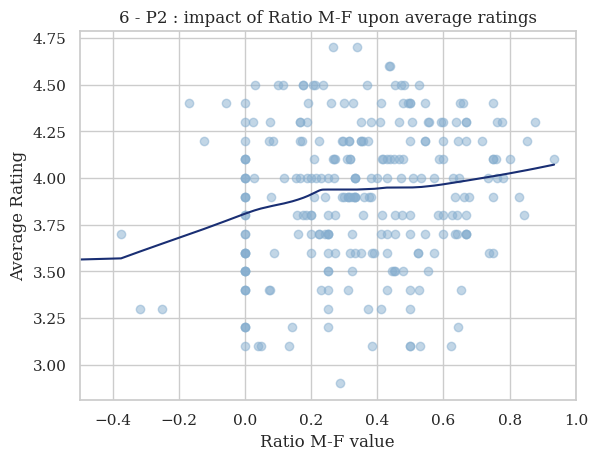

In [160]:
lowess = sm.nonparametric.lowess(df_ratio['Average rating'], df_ratio['Ratio_M-F'], frac=2./3)

plt.scatter(df_ratio['Ratio_M-F'], df_ratio['Average rating'], alpha=0.5, color = '#86aecf')
plt.plot(lowess[:, 0], lowess[:, 1], color = "#192e73")
plt.title("6 - P2 : impact of Ratio M-F upon average ratings")
plt.xlabel("Ratio M-F value")
plt.ylabel("Average Rating")
plt.xlim(-0.5, 1)
plt.show()


We can see in this figure (_fig.6_) that people tends to give higher ratings to game that requires more additional time upon mastering them.

In [156]:
df_end = df_comments[df_comments['Mastered'] == 1]

model = smf.ols(formula = 'Q("Rating") ~ Q("Ratio_M-F")', data = df_end).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Q("Rating")   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     515.4
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          1.85e-113
Time:                        18:59:29   Log-Likelihood:                -45520.
No. Observations:               45575   AIC:                         9.104e+04
Df Residuals:                   45573   BIC:                         9.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4252      0.006    704.

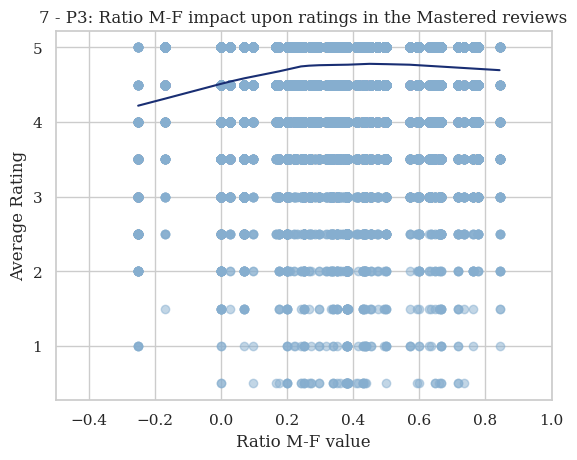

In [162]:
lowess = sm.nonparametric.lowess(df_end['Rating'], df_end['Ratio_M-F'], frac=2./3)

plt.scatter(df_end['Ratio_M-F'], df_end['Rating'], alpha=0.5, color = '#86aecf')
plt.plot(lowess[:, 0], lowess[:, 1], color = "#192e73")
plt.title("7 - P3: Ratio M-F impact upon ratings in the Mastered reviews")
plt.xlabel("Ratio M-F value")
plt.ylabel("Average Rating")
plt.xlim(-0.5, 1)
plt.show()

We can observe that among people that mastered a game, our intuition was correct : the best ratings are between 30 % and 50% of additional time to master a game. Ratings are lower when mastering a game doesn't requires finishing it, and too much time also diminish it.  

<br><br><br><br><br> _This study was conducted as part of a data science course._
<br><br>Although its results are indicative, we would like to point out that they are by no means definitive and would benefit from being supplemented by studies of other media (through questionnaires, audience analysis of “100%” content, etc.).
<br><br>Some ideas we would consider for a follow-up to this project: <br>- expand to a larger base of games and players
<br>- compare our results with other types of entertainment (TV series, books, puzzles, etc.)
<br>- study whether the need for completion also arises in everyday life, as a form of fulfillment, for example

<br><br> We have by no mean the pretention to tell you how you should play. Just remember to enjoy the game ! :) 